In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score, learning_curve, validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
%matplotlib inline

In [4]:
wta_data = pd.read_pickle("./wta_cleaned_data.pkl")
wta_data.head()

,draw_size,match_num,player_id,player_seed,player_height,player_age,best_of,minutes,ace,double_fault,...,player_hand_u,round_br,round_f,round_qf,round_r128,round_r16,round_r32,round_r64,round_rr,round_sf
0,4,1,201419,999.0,172.000000,18.173854,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
1,4,2,200085,999.0,163.000000,24.821355,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
2,4,1,200652,999.0,173.385424,26.973306,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
3,4,2,200128,999.0,189.000000,24.457221,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
4,4,1,200017,999.0,173.385424,28.928131,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0


In [5]:
mask = wta_data["french_open_2020"] == 1
wta_french_open_2020 = wta_data[mask]
wta_french_open_2020 = wta_french_open_2020.reset_index(drop=True)

In [6]:
wta_data = wta_data[wta_data["french_open_2020"] == 0]
wta_data.shape


(119184, 55)

In [7]:
wta_data = wta_data.reset_index(drop = True)


In [8]:
wta_data.head()

,draw_size,match_num,player_id,player_seed,player_height,player_age,best_of,minutes,ace,double_fault,...,player_hand_u,round_br,round_f,round_qf,round_r128,round_r16,round_r32,round_r64,round_rr,round_sf
0,4,1,201419,999.0,172.000000,18.173854,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
1,4,2,200085,999.0,163.000000,24.821355,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
2,4,1,200652,999.0,173.385424,26.973306,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
3,4,2,200128,999.0,189.000000,24.457221,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0
4,4,1,200017,999.0,173.385424,28.928131,3,173.385424,173.385424,173.385424,...,0,0,0,0,0,0,0,0,1,0


In [9]:
wta_data.shape


(119184, 55)

In [10]:
wta_data.describe()

,draw_size,match_num,player_id,player_seed,player_height,player_age,best_of,minutes,ace,double_fault,...,player_hand_u,round_br,round_f,round_qf,round_r128,round_r16,round_r32,round_r64,round_rr,round_sf
count,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,...,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000,119184.000000
mean,54.420124,78.336656,202288.487926,678.595248,173.383880,24.214985,3.002584,156.047072,72.627601,73.371405,...,0.039628,0.000017,0.021530,0.084508,0.110887,0.168798,0.314942,0.142939,0.113253,0.043127
std,41.012679,140.292425,3337.437318,463.550694,5.003082,4.646736,0.071846,37.671232,84.078929,83.558880,...,0.195084,0.004096,0.145143,0.278149,0.313994,0.374575,0.464495,0.350012,0.316904,0.203143
min,2.000000,1.000000,200001.000000,1.000000,153.000000,14.039699,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,9.000000,201212.000000,11.000000,173.000000,21.119781,3.000000,173.385424,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,24.000000,201450.000000,999.000000,173.385424,23.950719,3.000000,173.385424,5.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,91.000000,201616.000000,999.000000,174.000000,26.962355,3.000000,173.385424,173.385424,173.385424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,128.000000,2701.000000,223140.000000,999.000000,189.000000,173.385424,5.000000,2475.000000,173.385424,173.385424,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**check for missing values**

In [11]:
#Total missing values
wta_data.isnull().sum().sum()

0

In [12]:
# Random Seed
SEED = 42
np.random.seed = SEED

**check if the data is balance**
target is our target variable, we want to make sure the data is balanced

In [13]:
#check if the data is balance
wta_data['target'].value_counts()

1    59592
0    59592
Name: target, dtype: int64

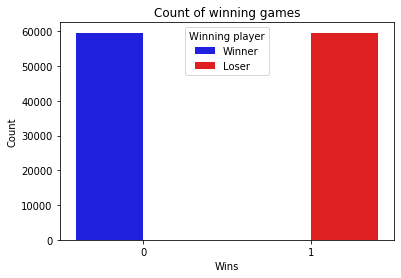

In [14]:
ax = sns.countplot(wta_data['target'], hue=wta_data['target'], palette=['blue', 'red'])
ax.set(xlabel='Wins', ylabel='Count')
ax.legend(title='Winning player', loc='upper center', labels=['Winner', 'Loser'])
ax.set_title('Count of winning games')
plt.show()

**Checking correlation between features**

In [15]:
wta_corr = wta_data.corr()
wta_corr['target'].sort_values(ascending=False)

target                1.000000e+00
player_rank_points    1.841313e-01
player_height         3.709185e-02
player_hand_r         2.803311e-02
first_serve_won       1.890927e-02
player_age            1.014702e-02
second_serve_won      7.199670e-03
ace                   3.701700e-03
first_serve_made      3.506079e-04
serve_game            2.765677e-04
tourney_level_t3      6.081210e-18
year                  5.040949e-18
tourney_level_pm      4.983196e-18
surface_clay          2.056637e-18
tourney_level_cc      1.958326e-18
tourney_level_c       1.754628e-18
tourney_level_d       1.613219e-18
tourney_level_t5      1.427942e-18
round_rr              8.759575e-19
tourney_level_t4      8.009784e-19
day                   3.074032e-19
surface_carpet        2.825560e-19
best_of               2.074491e-19
round_r16             2.026810e-19
round_r128            1.913518e-19
month                 1.639134e-19
surface_grass         1.555315e-19
tourney_level_f       1.172321e-19
round_qf            

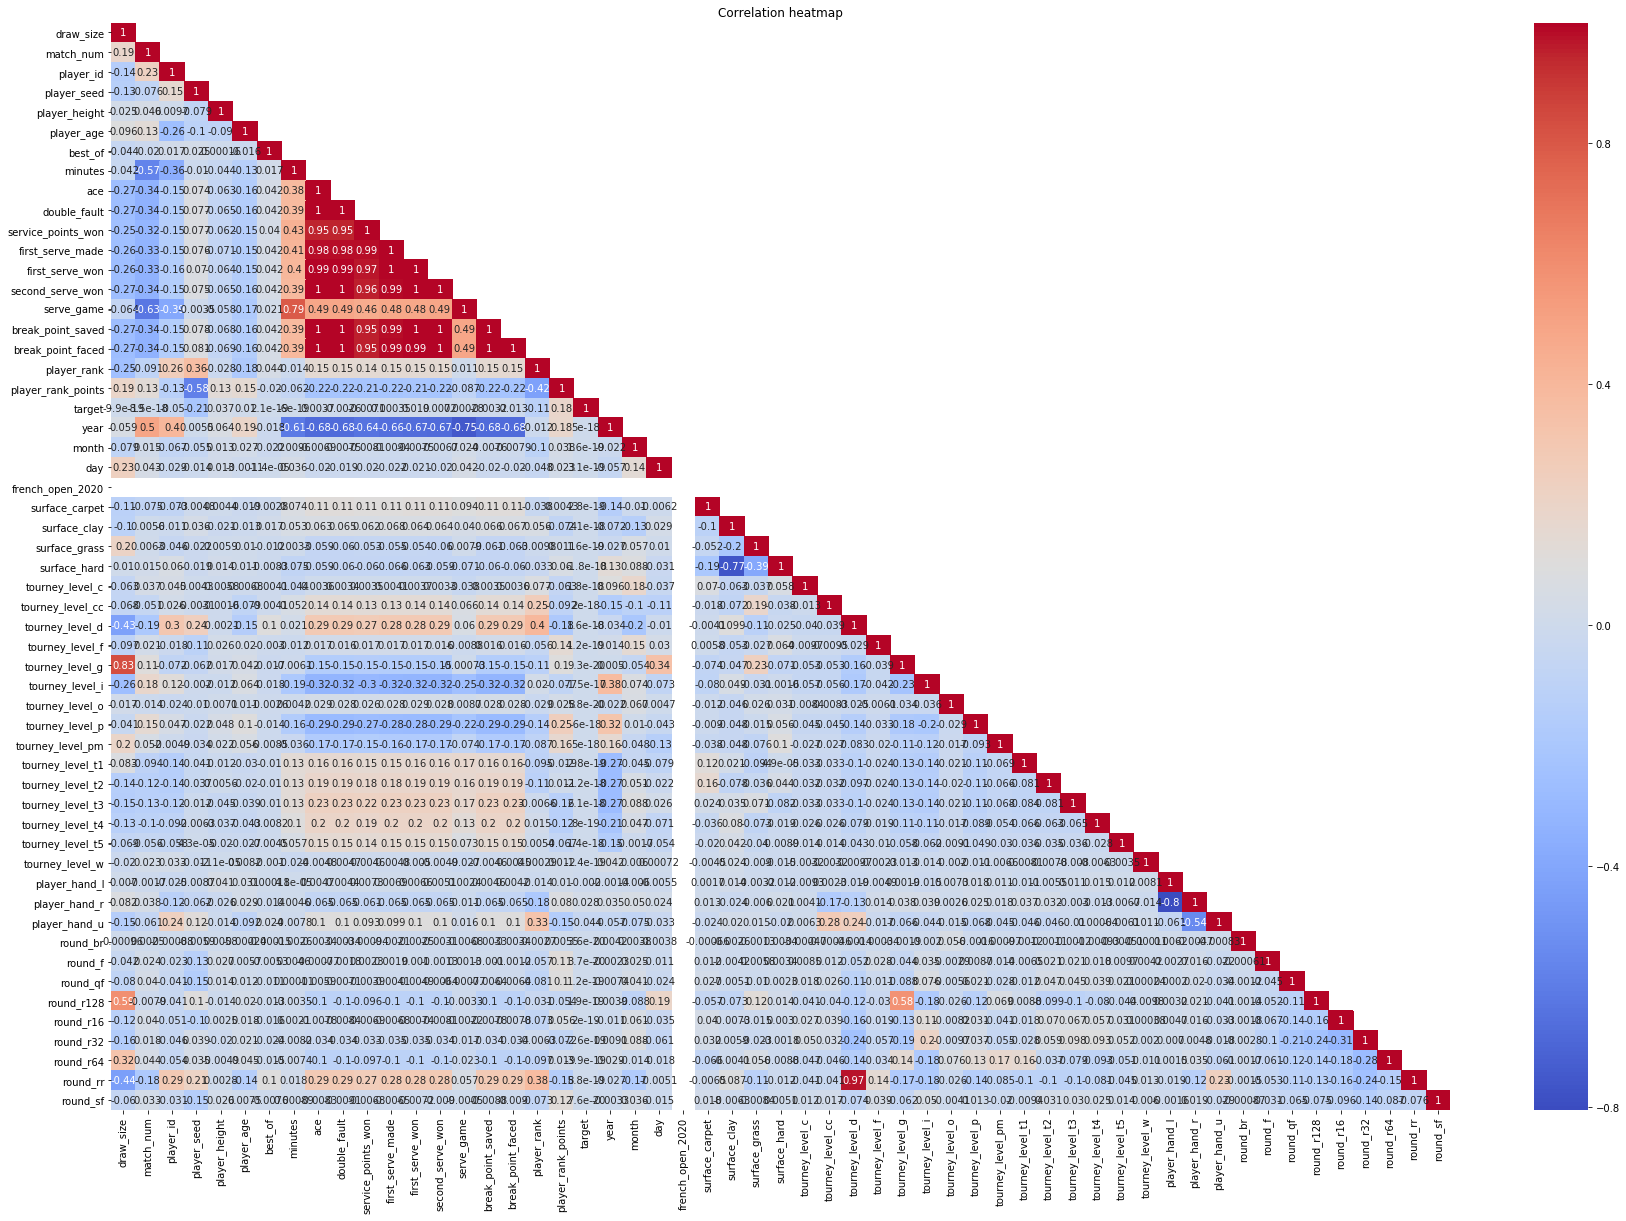

In [16]:
f, ax = plt.subplots(figsize= (30, 20))
lower = wta_corr.where(np.tril(np.ones(wta_corr.shape)).astype(np.bool))
hmap=sns.heatmap(lower,cmap="coolwarm", annot=True)
ax.set_title('Correlation heatmap')
plt.savefig('clean-corr-half.png')

**player_rank_points** is the highest positively correlated variable to the target variabl whereas **player_seed** is the negatively correlated to the target variable.

**Split data into training and testing sets**

In [17]:
X = wta_data.loc[:, wta_data.columns != 'target']
y = wta_data['target']

**Standardization**

In [18]:
#standardize both training and testing data
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=SEED)

**Apply the models on the Standardized Data**


**Logistic Regression**

In [19]:
lr = LogisticRegression()
lr_pipe = make_pipeline(lr)
lr_pipe.fit(X_std_train, y_std_train)

y_std_tr_pred = lr_pipe.predict(X_std_train)
y_std_ts_pred = lr_pipe.predict(X_std_test)

print("Accuracy score on train: {}\nAccuracy score on test: {}\n".format(accuracy_score(y_std_train, y_std_tr_pred), 
                                                                         accuracy_score(y_std_test, y_std_ts_pred)))

print("f1 score on train: {}\nf1 score on test: {}\n".format(f1_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                             f1_score(y_std_test, y_std_ts_pred, average='binary')))

print("Precision score on train: {}\nPrecision score on test: {}\n".format(precision_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                                           precision_score(y_std_test, y_std_ts_pred, average='binary')))

print("Recall score on train: {}\nRecall score on test: {}\n".format(recall_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                                     recall_score(y_std_test, y_std_ts_pred, average='binary')))

C:\Users\JAH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score on train: 0.731540969458695
Accuracy score on test: 0.730814408770556

f1 score on train: 0.724740988361375
f1 score on test: 0.7222302386655508

Precision score on train: 0.7435755176153128
Precision score on test: 0.7460203899123592

Recall score on train: 0.706837033130364
Recall score on test: 0.6999105045307081



**Random Forest**

In [20]:
rf = RandomForestClassifier()
rf_pipe = make_pipeline(rf)
rf_pipe.fit(X_std_train, y_std_train)

y_std_tr_pred = rf_pipe.predict(X_std_train)
y_std_ts_pred = rf_pipe.predict(X_std_test)

print("Accuracy score on train: {}\nAccuracy score on test: {}\n".format(accuracy_score(y_std_train, y_std_tr_pred), 
                                                                         accuracy_score(y_std_test, y_std_ts_pred)))

print("f1 score on train: {}\nf1 score on test: {}\n".format(f1_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                             f1_score(y_std_test, y_std_ts_pred, average='binary')))

print("Precision score on train: {}\nPrecision score on test: {}\n".format(precision_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                                           precision_score(y_std_test, y_std_ts_pred, average='binary')))

print("Recall score on train: {}\nRecall score on test: {}\n".format(recall_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                                     recall_score(y_std_test, y_std_ts_pred, average='binary')))

C:\Users\JAH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy score on train: 0.9861916862444263
Accuracy score on test: 0.695603535071037

f1 score on train: 0.9860785498489426
f1 score on test: 0.6781785925487877

Precision score on train: 0.9942245832927186
Precision score on test: 0.7193576715594029

Recall score on train: 0.9780649182528648
Recall score on test: 0.6414587761494575



**Bagging classiefier**

In [21]:
bagged_config = dict(n_estimators=10, max_samples=0.6, max_features=0.7, random_state=42, n_jobs=-1)


clb = [lr_pipe, rf_pipe]
clb_names = ['LogisticRegression', 'Random Forest']

for name, cl in zip(clb_names, clb):
    
    bagcl = BaggingClassifier(cl, **bagged_config)
    
    stdsc = StandardScaler()

    #x_ts_sd = stdsc.fit_transform(X_test)

    y_tr_pred = lr_pipe.predict(X_std_train)
    y_ts_pred = lr_pipe.predict(X_std_test)

print("Accuracy score on train: {}\nAccuracy score on test: {}\n".format(accuracy_score(y_std_train, y_std_tr_pred), 
                                                                         accuracy_score(y_std_test, y_std_ts_pred)))

print("f1 score on train: {}\nf1 score on test: {}\n".format(f1_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                             f1_score(y_std_test, y_std_ts_pred, average='binary')))

print("Precision score on train: {}\nPrecision score on test: {}\n".format(precision_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                                           precision_score(y_std_test, y_std_ts_pred, average='binary')))

print("Recall score on train: {}\nRecall score on test: {}\n".format(recall_score(y_std_train, y_std_tr_pred, average='binary'), 
                                                                     recall_score(y_std_test, y_std_ts_pred, average='binary')))

Accuracy score on train: 0.9861916862444263
Accuracy score on test: 0.695603535071037

f1 score on train: 0.9860785498489426
f1 score on test: 0.6781785925487877

Precision score on train: 0.9942245832927186
Precision score on test: 0.7193576715594029

Recall score on train: 0.9780649182528648
Recall score on test: 0.6414587761494575



# GridSearchCV

**Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state= 42, C = 1, solver='liblinear')

param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

lr_cv = GridSearchCV(lr, param_grid, cv=10)
lr_cv.fit(X_std_train, y_std_train)

y_std_tr_pred = lr_cv.predict(X_std_train)
y_std_ts_pred = lr_cv.predict(X_std_test)

print(lr_cv.best_params_) 
print(lr_cv.best_score_)

In [ ]:
#accuracy score on the training set
accuracy_score(y_std_train, y_std_tr_pred) 

# ANALYSIS

In [24]:
X_20 = wta_french_open_2020.loc[:, wta_french_open_2020.columns != 'target']
y_20 = wta_french_open_2020['target']

In [26]:
X_20_pred = rf_pipe.predict(X_20 )

accuracy_score(y_20, X_20_pred)

0.5

In [27]:
X_20_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [28]:
np.unique(X_20_pred)

array([1], dtype=int64)

In [29]:
len(X_20_pred)

254

In [143]:
#add a column to X_20_pred
atp_french_open_2020['predicted_values']=X_20_pred

**Dataset with the predicted column**

In [ ]:
reduced_df_french.to_pickle("C:/Users/JAH/Documents/DSE/DSE2100_ML_project_dataset.pkl")

In [ ]:
reduced_df_french.to_csv("C:/Users/JAH/Documents/DSE/DSE2100_ML_project_dataset.csv")